# Visualization with Matplotlib

In order to understand and effectively use Matplotlib to make visualizations of data, it's important to understand the parts of a Matplotlib figure object. The code in the cell below is [taken directly from the Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html), which uses Matplotlib code to create an annotated graph that demonstrates the many facets of a plot. And because the code is provided, it illustrates how to use them. Note that some of the objects and methods used in the code below are things that you might not use regularly (if ever). But many of the methods below will become very familiar to you throughout the rest of the semester and as you use Matplotlib in your research

### __Challenge:__ What is the code below doing?

Execute the Jupyter notebook code below and verify that it produces a plot with a variety of annotations. Then, with a partner, review the lines of the cell and add comments that denote what the line of code does. Also, in the last class when we made our first figure, we used the command `plt.xlabel('Axis label')` command as opposed to the use of the `ax.set_label('Axis label')` in the code below. Why do these two uses differ? 

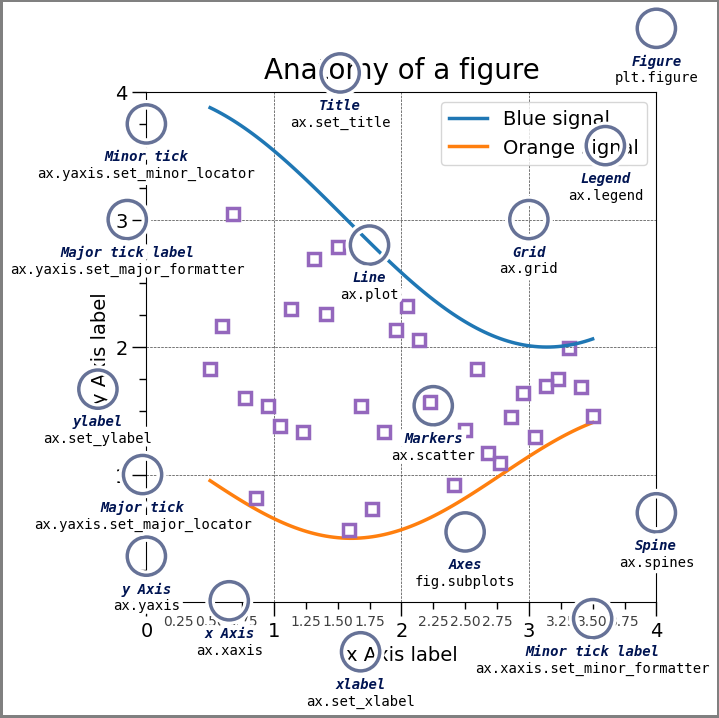

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

## __Challenge:__ Beautify an Intentionally Ugly Graph

The code in the cell below reads in daily average streamflow data for Water Year 2017 (i.e., from 2016-10-01 to 2017-09-30) for one of four gages in the Upper Boise River Basin. It uses the `pandas` library to do so. We'll learn a lot more about `pandas` later, but for now this provides us with the ability to deal with dates and times in a structured way that doesn't require us to format text. 

The cell that follows then creates a very rudimentary (i.e., bad) plot of the streamflow for the water year. Your task as a table, is to use what you learned about Matplotlib figures in the exercise above, and the [Matplotlib documentation](https://matplotlib.org/stable/users/index) (if needed) to create something approaching a "presentation ready" figure for streamflow at your gage. Some minimum characteristics of such a figure include:

- Use of SI units
- Labelled axes
- Clear labeling of what is being plotted (search the web if you need to)
- Legible font sizes

When you're done, create __one__ figure that represents the code of your table and paste the output figure it in [this shared slide deck](https://docs.google.com/presentation/d/1bUpZ3Ms1-QGXGN1pgU7CGhgaOo3ZtHv3ZnWLGHfxvj4/edit?usp=sharing). 


In [ ]:
import pandas as pd # Needed to read data in
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

tableMC = 0 # Your table
tableBR = 1
tableSFF = 2
tableSFA = 3

gages = ['13200000', # Mores Creek Above Robie Creek
         '13185000', # Boise River Near Twin Springs
         '13186000', # SF Boise River near Featherville 
         '13192200'  # SF Boise Near Arrowrock Dam
         ]

filenameMC = 'Unit02-data/usgs_streamflow_'+gages[tableMC]+'_dv.csv'
filenameBR = 'Unit02-data/usgs_streamflow_'+gages[tableBR]+'_dv.csv'
filenameSFF = 'Unit02-data/usgs_streamflow_'+gages[tableSFF]+'_dv.csv'
filenameSFA = 'Unit02-data/usgs_streamflow_'+gages[tableSFA]+'_dv.csv'

# Use Pandas to read the data into a "DataFrame." More on this later, but think of 
# df below as an object that stores a spreadsheet with columns that have names
dfMC = pd.read_csv(filenameMC)
dfBR = pd.read_csv(filenameBR)
dfSFF = pd.read_csv(filenameSFF)
dfSFA = pd.read_csv(filenameSFA)

dfMC['q_cms']=dfMC['q_cfs']*0.02832
dfBR['q_cms']=dfBR['q_cfs']*0.02832
dfSFF['q_cms']=dfSFF['q_cfs']*0.02832
dfSFA['q_cms']=dfSFA['q_cfs']*0.02832

display(dfMC)
display(dfBR)
display(dfSFF)
display(dfSFA)

,date,q_cfs,q_cms
0,2016-10-01,26.1,0.739152
1,2016-10-02,26.4,0.747648
2,2016-10-03,27.4,0.775968
3,2016-10-04,28.6,0.809952
4,2016-10-05,30.4,0.860928
...,...,...,...
360,2017-09-26,56.0,1.585920
361,2017-09-27,54.0,1.529280
362,2017-09-28,52.5,1.486800
363,2017-09-29,51.2,1.449984


,date,q_cfs,q_cms
0,2016-10-01,329.0,9.31728
1,2016-10-02,331.0,9.37392
2,2016-10-03,342.0,9.68544
3,2016-10-04,351.0,9.94032
4,2016-10-05,352.0,9.96864
...,...,...,...
360,2017-09-26,502.0,14.21664
361,2017-09-27,496.0,14.04672
362,2017-09-28,489.0,13.84848
363,2017-09-29,480.0,13.59360


,date,q_cfs,q_cms
0,2016-10-01,198.0,5.60736
1,2016-10-02,206.0,5.83392
2,2016-10-03,209.0,5.91888
3,2016-10-04,209.0,5.91888
4,2016-10-05,208.0,5.89056
...,...,...,...
360,2017-09-26,325.0,9.20400
361,2017-09-27,323.0,9.14736
362,2017-09-28,319.0,9.03408
363,2017-09-29,314.0,8.89248


,date,q_cfs,q_cms
0,2016-10-01,376.0,10.64832
1,2016-10-02,372.0,10.53504
2,2016-10-03,366.0,10.36512
3,2016-10-04,374.0,10.59168
4,2016-10-05,370.0,10.47840
...,...,...,...
360,2017-09-26,398.0,11.27136
361,2017-09-27,392.0,11.10144
362,2017-09-28,383.0,10.84656
363,2017-09-29,382.0,10.81824


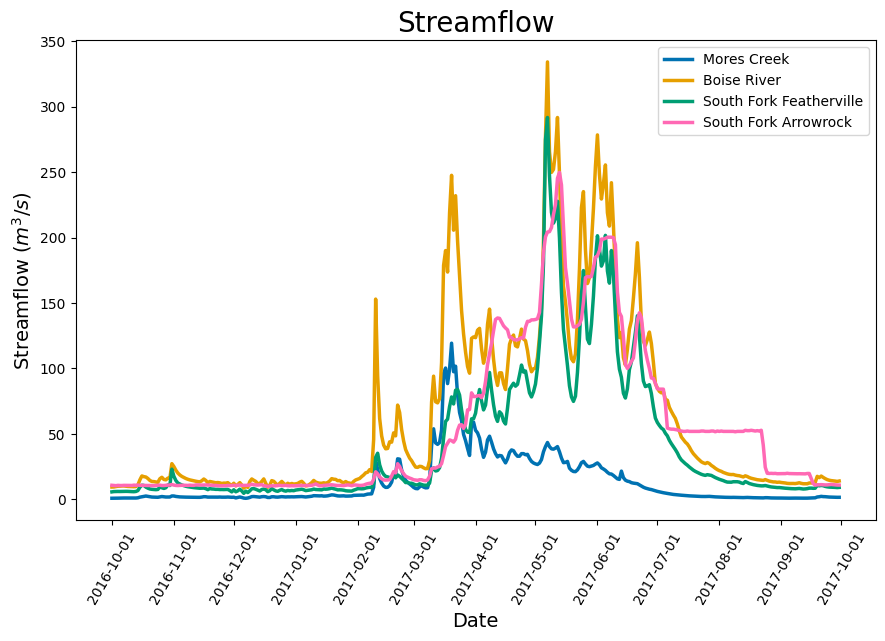

In [ ]:
dfMC['date']=pd.to_datetime(dfMC['date'])
dfBR['date']=pd.to_datetime(dfBR['date'])
dfSFF['date']=pd.to_datetime(dfSFF['date'])
dfSFA['date']=pd.to_datetime(dfSFA['date'])



fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.tick_params(axis='x',labelrotation=60)
#ax.yaxis.set_major_locator(MultipleLocator(1))

ax.plot(dfMC['date'],dfMC['q_cms'], c='#0072B2', lw=2.5, label='Mores Creek')
ax.plot(dfBR['date'],dfBR['q_cms'], c='#E69F00', lw=2.5, label='Boise River')
ax.plot(dfSFF['date'],dfSFF['q_cms'], c='#009E73', lw=2.5, label='South Fork Featherville')
ax.plot(dfSFA['date'],dfSFA['q_cms'], c='#FF69B4', lw=2.5, label='South Fork Arrowrock')

ax.set_title('Streamflow', fontsize=20)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Streamflow ($m^3/s$)', fontsize=14)
ax.legend(loc="upper right", fontsize=10)

plt.show()

In [ ]:
# in class notes
x=0
x

: 